# Work Flow
1. Collecting Dataset:
  - Collecting the appropriate Dataset
  - In dataset basically contain two set of Images With Mask and Without Mask
  - This is basically Binary Classification Problem
   - Kaggle Dataset
2. Image Processing:
  - Once we add the dataset there are a lot of processing we have to do so this is called as Image Processing.
  - Where we have to do processing such as resacing of the images
  - Converting into numpy array
  - Once image has been processed the next step would be spliting data.
3. Train test Split:
  - Train set for training data
  - Test set used for evaluate model
4. feed data to CNN:
  - Do model Building
5. Evaluation:
  - Checking accuracy of the model

In [40]:
!pip install kaggle

In [41]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Kaggle Dataset

In [42]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [44]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


# Importing Dependencies

In [45]:
import os # To access the folders
import pandas as pd
import numpy as np # Numpy Array
import matplotlib.pyplot as plt # Visualization\
import matplotlib.image as mpimg # Visualization
import cv2 # Image processing and Doing tasks with related to images
from google.colab.patches import cv2_imshow # In cv2 librabry # Create new window and display image in that window
from PIL import Image # PILLO Library is used to Image processing library and used to read images and do processing on it.
from sklearn.model_selection import train_test_split # Splitting data into train and testing data
import warnings
warnings.filterwarnings('ignore')

In [46]:
with_mask = os.listdir('/content/data/with_mask') # Used to import file
print(with_mask[:5])

['with_mask_1140.jpg', 'with_mask_1832.jpg', 'with_mask_1.jpg', 'with_mask_3250.jpg', 'with_mask_3308.jpg']


In [47]:
without_mask = os.listdir('/content/data/without_mask')
print(without_mask[0:5])

['without_mask_2600.jpg', 'without_mask_247.jpg', 'without_mask_2508.jpg', 'without_mask_1126.jpg', 'without_mask_1356.jpg']


In [48]:
len(with_mask) # Checking Count of images

3725

In [49]:
len(without_mask) # Checking Count of images

3828

**Creating Labels for Two class of Images**

- with mask --> 1
- without mask --> 0

In [39]:
# Create the labels
with_mask_labels= [1]*3725
without_mask_labels = [0]*3828

In [52]:
print(with_mask_labels[0:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [53]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [54]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

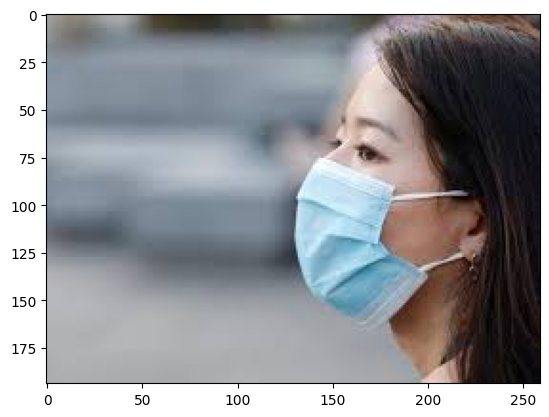

In [62]:
# Displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2500.jpg')
ingplot = plt.imshow(img)
plt.show()

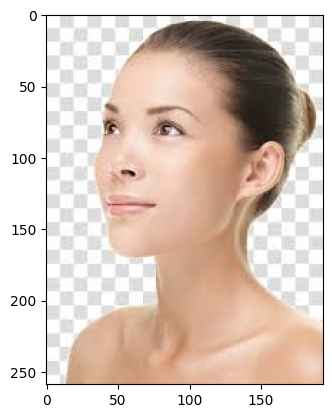

In [63]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**
- Resize the Images
- Convert the Images in Numpy Arrays

In [71]:
# Converting Images into Numpy Array
with_mask_path = '/content/data/with_mask/' # we need to add forward slash

data = [] # Empty list

for img_file in with_mask: # Iterating
  image = Image.open(with_mask_path + img_file) # For reading Image we use open cmd
  image = image.resize((128,128)) # Resizing Image (Height and Width)
  image = image.convert('RGB') # Few images are in black and white so we have to convert into RGB
  image = np.array(image) # Converting images into Numpy array using np.array function
  data.append(image) # adding numpy array into data


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [72]:
type(data)

list

In [73]:
len(data)

7553

array([[[ 48,  48,  58],
        [ 49,  49,  59],
        [ 49,  49,  59],
        ...,
        [ 90,  92, 104],
        [ 92,  94, 106],
        [103, 105, 117]],

       [[ 48,  48,  58],
        [ 49,  49,  59],
        [ 50,  50,  60],
        ...,
        [ 90,  93, 102],
        [ 93,  97, 105],
        [101, 104, 113]],

       [[ 47,  50,  59],
        [ 47,  50,  59],
        [ 49,  50,  60],
        ...,
        [ 89,  93,  98],
        [ 93,  99, 105],
        [ 98, 104, 109]],

       ...,

       [[ 33,  36,  45],
        [ 33,  36,  45],
        [ 33,  36,  45],
        ...,
        [ 92, 101, 131],
        [ 82,  90, 119],
        [ 72,  79, 106]],

       [[ 34,  37,  46],
        [ 34,  37,  46],
        [ 33,  36,  45],
        ...,
        [ 80,  89, 120],
        [ 72,  80, 109],
        [ 60,  67,  92]],

       [[ 33,  36,  45],
        [ 33,  36,  45],
        [ 33,  36,  45],
        ...,
        [ 74,  83, 112],
        [ 55,  65,  91],
        [ 47,  55,  78]]], dtype=uint8)
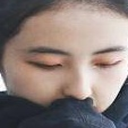

In [74]:
data[0]

In [75]:
type(data[0])

numpy.ndarray

In [76]:
data[0].shape

(128, 128, 3)

In [78]:
# Coverting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

# Train Test Split

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=2)

In [80]:
print(x.shape, xtrain.shape,xtest.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


#Scaling the data

In [81]:
# Data is scaled between 0 to 1 like normalization
x_train_scaled = xtrain/255
x_test_scaled = xtest/255

**Building Convolutional Neural Network (CNN)**

- Tensorflow and Pytorch are widely used library to build the neural network models
- Tensorflow is developed by google
- Pytorch is developed by facebook
- keras is wrapper of these library
- keras needs either tensorflow or Pytorch in backend
- Tensorflow included keras in his library itself
- Now we can import tensorflow and keras comes with it

In [83]:
import tensorflow as tf
from tensorflow import keras

Architecture of Convolutional Neural Network

In [87]:
num_of_classes = 2

model = keras.Sequential() # Initilization of Model / In this we stack of all layers

model.add(keras.layers.Conv2D( 32 , kernel_size=(3,3), activation = 'relu', input_shape = (128,128,3))) # Convolutional Layer

# Input layer are imp RGB = 3 if grey scale = Not need to mention should be present only in first layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # Max Pooling Layer

model.add(keras.layers.Conv2D( 64, kernel_size = (3,3), activation = 'relu')) # Convolutional layer
model.add(keras.layers.MaxPooling2D(pool_size = (2,2))) # Max Pooling Layer

model.add(keras.layers.Flatten()) #

model.add(keras.layers.Dense( 128, activation = 'relu')) # 128 Neurons in the Model 256,64,32 Powers of 2 to select better result
model.add(keras.layers.Dropout(0.5)) # No overfitting / Dropout reduces risk of model getting overfitted

model.add(keras.layers.Dense( 64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [90]:
# Compile Neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [91]:
# Training the Neural Network
history =model.fit(x_train_scaled,ytrain, epochs = 5,validation_split = 0.1)
# Acc should be increase and loss value should be descrease

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 136s 786ms/step - acc: 0.6939 - loss: 0.6190 - val_acc: 0.8727 - val_loss: 0.2983
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 137s 758ms/step - acc: 0.8703 - loss: 0.3113 - val_acc: 0.8975 - val_loss: 0.2541
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 754ms/step - acc: 0.8989 - loss: 0.2461 - val_acc: 0.9322 - val_loss: 0.1893
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 756ms/step - acc: 0.9086 - loss: 0.2215 - val_acc: 0.9388 - val_loss: 0.1955
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 759ms/step - acc: 0.9287 - loss: 0.1818 - val_acc: 0.9041 - val_loss: 0.2744


**Model Evaluation**

In [92]:
loss, accuracy = model.evaluate(x_test_scaled, ytest)

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - acc: 0.8950 - loss: 0.2603


In [93]:
print('Test Accuracy', accuracy)

Test Accuracy 0.9033752679824829


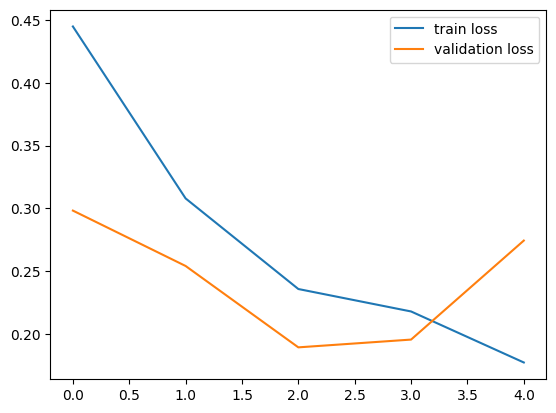

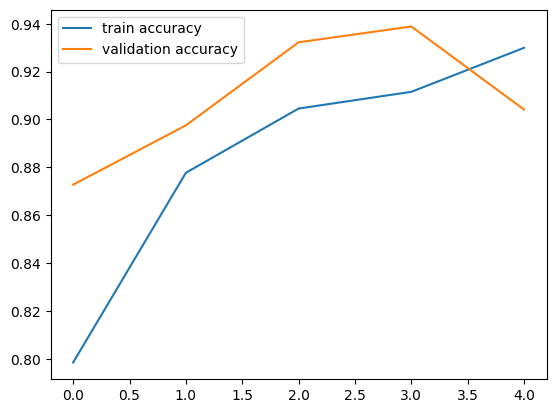

In [96]:
h = history

# Plot the loss value

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [98]:
input_image_path = input('Path of the image to be predicted: ') # User give path of user

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label ==1:
  print("The person in the image is wearing a mask")
else:
  print('The person in the image is not wearing a mask')

KeyboardInterrupt: Interrupted by user